In [1]:
# import libraries

# import pandas
import pandas as pd

# import geopandas
import geopandas as gpd

#import contextily
import contextily as ctx

#import matplotlib
import matplotlib.pyplot as plt

# to download osm data
import osmnx as ox

import urllib.request, json 

import networkx as nx

In [2]:
nxtg = gpd.read_file('data/200820_NextGen_Transit_First_DX15.shp')
ex = gpd.read_file('data/Existing_Bus_System.shp')

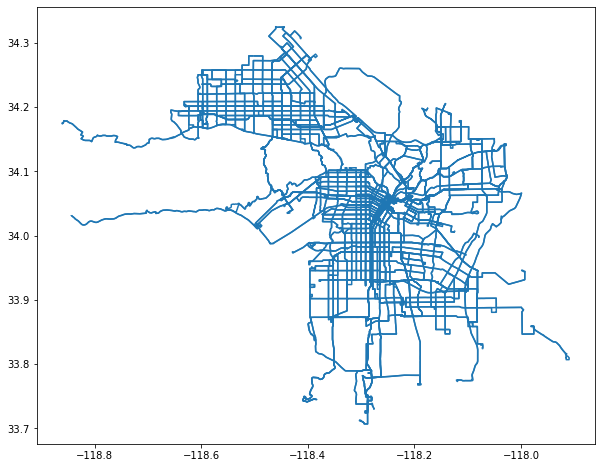

In [3]:
nxtg.plot(figsize=(10,10))

In [4]:
nxtg.head(10)

Id shape_id   route_id agency_id rt_shrt_nm  \
0   0   100522   10-14179      None         10   
1   0   100523   10-14179      None         10   
2   0  1020099  102-14179      None        102   
3   0  1020100  102-14179      None        102   
4   0  1050243  105-14179      None        105   
5   0  1050244  105-14179      None        105   
6   0  1060029  106-14179      None        106   
7   0  1060030  106-14179      None        106   
8   0  1060031  106-14179      None        106   
9   0  1060032  106-14179      None        106   

                                          rt_long_nm route_desc  route_type  \
0  W HOLLYWOOD-DTWN LA -AVALON STA VIA MELROSE-AV...       None           3   
1  W HOLLYWOOD-DTWN LA -AVALON STA VIA MELROSE-AV...       None           3   
2             LEIMERT PARK - MAYWOOD VIA DISTRICT BL       None           3   
3             LEIMERT PARK - MAYWOOD VIA DISTRICT BL       None           3   
4             W HOLLYWOOD - VERNON VIA LA CIENEGA BL       None           3   
5             W HOLLYWOOD - VERNON VIA LA CIENEGA BL       None           3   
6             CSULA-LAC/USC-ELAC-SHOPS AT MONTEBELLO       None           3   
7             CSULA-LAC/USC-ELAC-SHOPS AT MONTEBELLO       None           3   
8             CSULA-LAC/USC-ELAC-SHOPS AT MONTEBELLO       None           3   
9             CSULA-LAC/USC-ELAC-SHOPS AT MONTEBELLO       None           3   

  rt_typ_txt route_url rt_color     rt_col_fmt rt_txt_col rt_txt_fmt  \
0        Bus      None   FF8000  (255, 128, 0)       None       None   
1        Bus      None   FF8000  (255, 128, 0)       None       None   
2        Bus      None   FF8000  (255, 128, 0)       None       None   
3        Bus      None   FF8000  (255, 128, 0)       None       None   
4        Bus      None   FF8000  (255, 128, 0)       None       None   
5        Bus      None   FF8000  (255, 128, 0)       None       None   
6        Bus      None   FF8000  (255, 128, 0)       None       None   
7        Bus      None   FF8000  (255, 128, 0)       None       None   
8        Bus      None   FF8000  (255, 128, 0)       None       None   
9        Bus      None   FF8000  (255, 128, 0)       None       None   

                                            geometry  
0  LINESTRING (-118.26519 33.92774, -118.26519 33...  
1  LINESTRING (-118.38162 34.08492, -118.38375 34...  
2  LINESTRING (-118.39738 33.95987, -118.39649 33...  
3  LINESTRING (-118.18086 33.98625, -118.18094 33...  
4  LINESTRING (-118.22746 34.00463, -118.22755 34...  
5  LINESTRING (-118.38162 34.08492, -118.38375 34...  
6  LINESTRING (-118.16871 34.06311, -118.16921 34...  
7  LINESTRING (-118.14596 34.03997, -118.14606 34...  
8  LINESTRING (-118.08442 34.03435, -118.08508 34...  
9  LINESTRING (-118.16871 34.06311, -118.16921 34...

In [5]:
nxtg.shape

(284, 15)

In [6]:
nxtg.type

0      LineString
1      LineString
2      LineString
3      LineString
4      LineString
          ...    
279    LineString
280    LineString
281    LineString
282    LineString
283    LineString
Length: 284, dtype: object

In [7]:
type(nxtg)

geopandas.geodataframe.GeoDataFrame

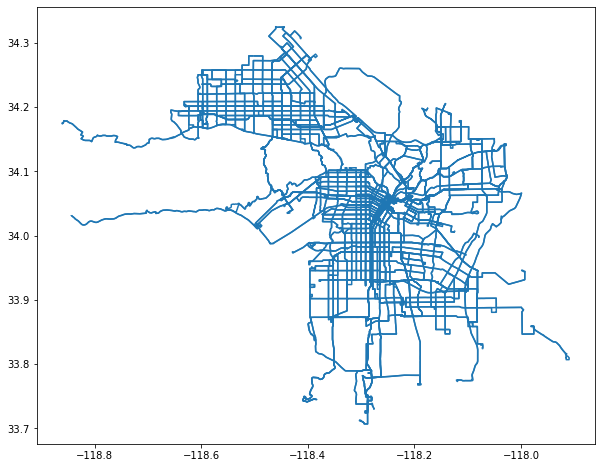

In [8]:
nxtg.plot(figsize=(10,10))

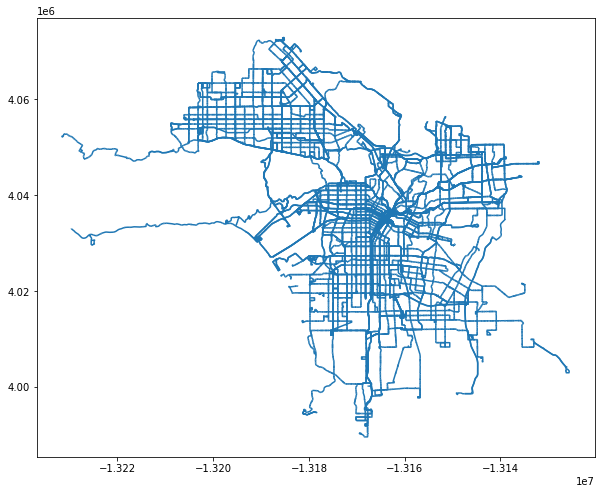

In [9]:
ex.plot(figsize=(10,10))

In [10]:
ex.head(10)

rte rte2             rteDesc rteNum   tier  ampk_1  midday_1  pmpk_1  \
0   2.0    2         Sunset Blvd      2  Local    15.0      15.0    15.0   
1   4.0    4   Santa Monica Blvd      4  Local    10.0      15.0    10.0   
2  10.0   10   Melrose/San Pedro  10/48  Local     7.5      20.0    10.0   
3  14.0   14       Beverly/Adams  14/37  Local     6.0      15.0     7.5   
4  16.0   16              3rd St     16  Local    10.0      10.0    20.0   
5  18.0   18              6th St     18  Local     5.0      10.0     7.5   
6  20.0   20       Wilshire Blvd     20  Local    10.0      12.0    10.0   
7  28.0   28  Eagle Rock/Olympic     28  Local    12.0      30.0    15.0   
8  30.0   30           Pico Blvd     30  Local    12.0      12.0    12.0   
9  33.0   33         Venice Blvd     33  Local    12.0      20.0    12.0   

   seven_9_10  ten_12_13  ...  sa79  sa1012  sa24  su68  su111  su35  su79  \
0        20.0       30.0  ...  20.0    30.0  60.0  20.0   20.0  20.0  30.0   
1        20.0       20.0  ...  20.0    20.0  30.0  20.0   15.0  15.0  25.0   
2        30.0       60.0  ...  18.0    60.0  60.0  30.0   20.0  20.0  40.0   
3        15.0       60.0  ...  30.0    60.0  60.0  25.0   20.0  20.0  25.0   
4        15.0       30.0  ...  10.0    20.0   0.0  12.0    8.0   8.0  20.0   
5        22.0       30.0  ...  25.0    30.0  60.0  15.0   15.0  12.0  25.0   
6        20.0       30.0  ...  25.0    30.0  30.0  25.0   20.0  20.0  20.0   
7        30.0       30.0  ...  20.0    30.0  60.0  18.0   15.0  15.0  25.0   
8        10.0       30.0  ...  20.0    30.0  60.0  15.0   12.0  10.0  25.0   
9        20.0       30.0  ...  15.0    25.0  30.0  30.0   20.0  20.0  20.0   

   su1012  su24                                           geometry  
0    30.0  60.0  MULTILINESTRING ((-13165102.619 4033296.175, -...  
1    25.0  25.0  MULTILINESTRING ((-13190607.696 4031215.079, -...  
2    60.0  60.0  MULTILINESTRING ((-13165702.631 4019568.409, -...  
3    60.0  60.0  MULTILINESTRING ((-13166009.094 4032358.063, -...  
4    20.0   0.0  MULTILINESTRING ((-13178905.457 4032744.770, -...  
5    30.0  60.0  MULTILINESTRING ((-13149677.746 4029474.364, -...  
6    30.0  30.0  MULTILINESTRING ((-13190715.230 4031111.934, -...  
7    30.0  60.0  MULTILINESTRING ((-13164469.434 4034391.139, -...  
8    30.0  60.0  MULTILINESTRING ((-13157114.110 4033263.399, -...  
9    25.0  30.0  MULTILINESTRING ((-13188099.000 4027104.775, -...  

[10 rows x 24 columns]

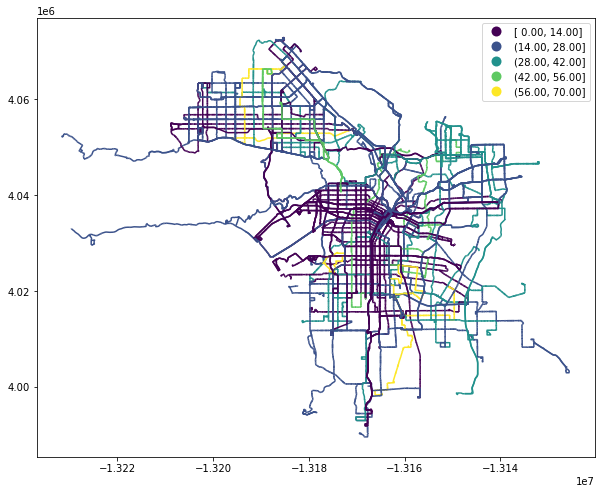

In [11]:
ex.plot(figsize=(10,10),
          column = 'ampk_1', 
          legend= True ,
          scheme = 'equal_interval')

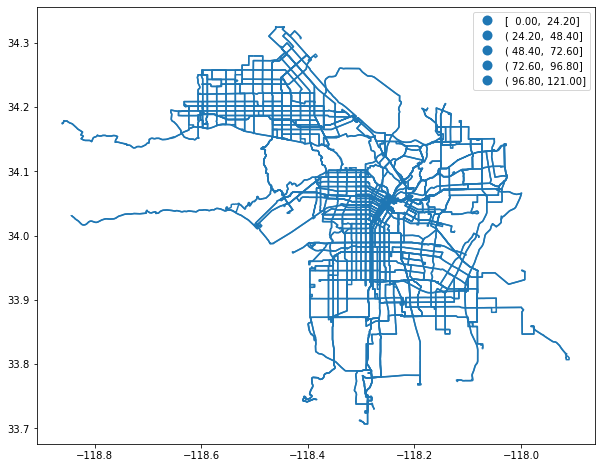

In [12]:
nxtg.plot(figsize=(10,10),
             column = 'rt_shrt_nm',
             legend = True ,
             scheme = 'equal_interval')

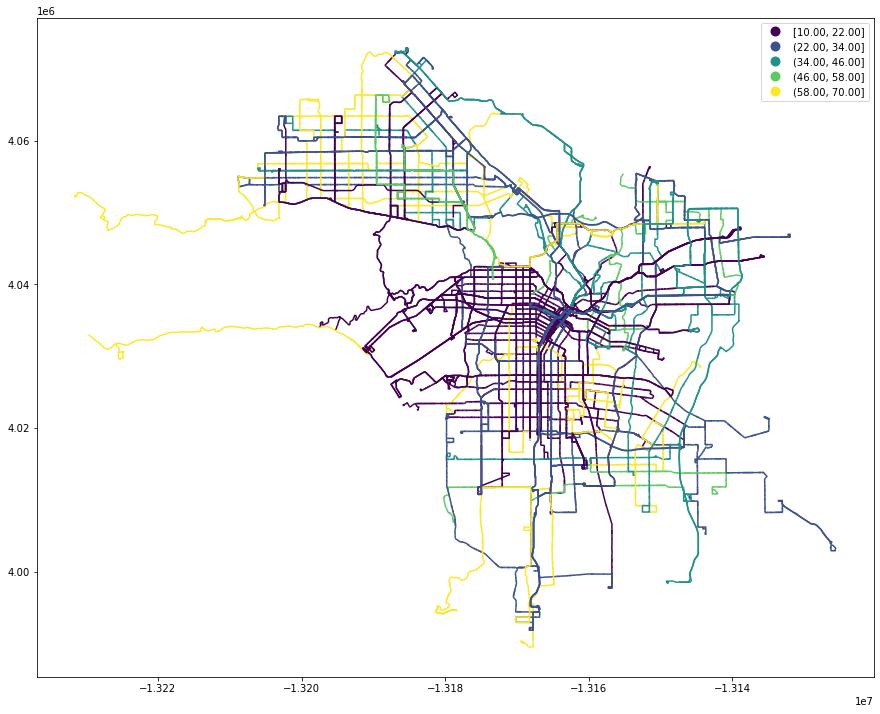

In [13]:
ex_mid = ex[ex['midday_1']!=0]
ex_mid.plot(figsize =(15,15),
            column = 'midday_1',
            legend = True,
            scheme = 'equal_interval')


Compare the am frequencies with the pm frequencies. First, I will drop the 0's from both the am and pm columns

In [14]:
ex_am = ex[ex['ampk_1']!=0]
ex_pm = ex[ex['pmpk_1']!=0]

In [15]:
# plot maps side by side

# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize = (30,30))

# name each subplot
ax1, ax2 = axs

#regular count map on the left
ex_am.plot(column='ampk_1',
           cmap='plasma'
           scheme='equal_interval',
           k=5,
           ax=ax1,, # this assigns the map to the subplot
           legend=True
           )

ax1.axis("off")
ax1.set_title("Peak Morning Bus Frequency")

# spatial lag map on the right
ex_pm.plot(column='pmpk_1', 
            cmap='plasma',
            scheme='equal_interval',
            k=5,  
            ax=ax2, # this assigns the map to the subplot
            legend=True
            )

ax2.axis("off")
ax2.set_title("Peak Evening Bus Frequency")

SyntaxError: invalid syntax (<ipython-input-15-9da660e5709a>, line 12)

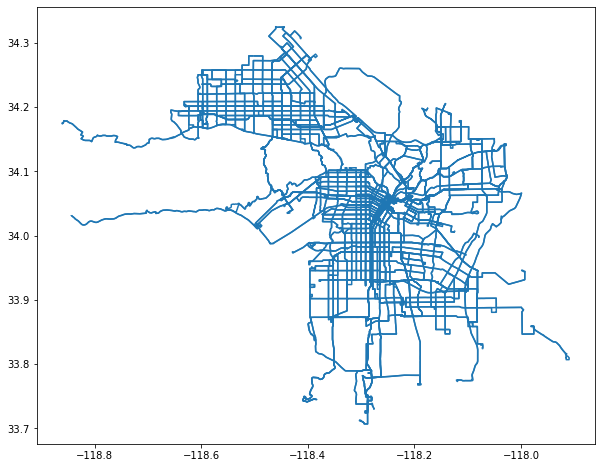

In [16]:
nxtg.plot(figsize=(10,10))

Text(0.5, 1.0, 'NextGen Bus Network')

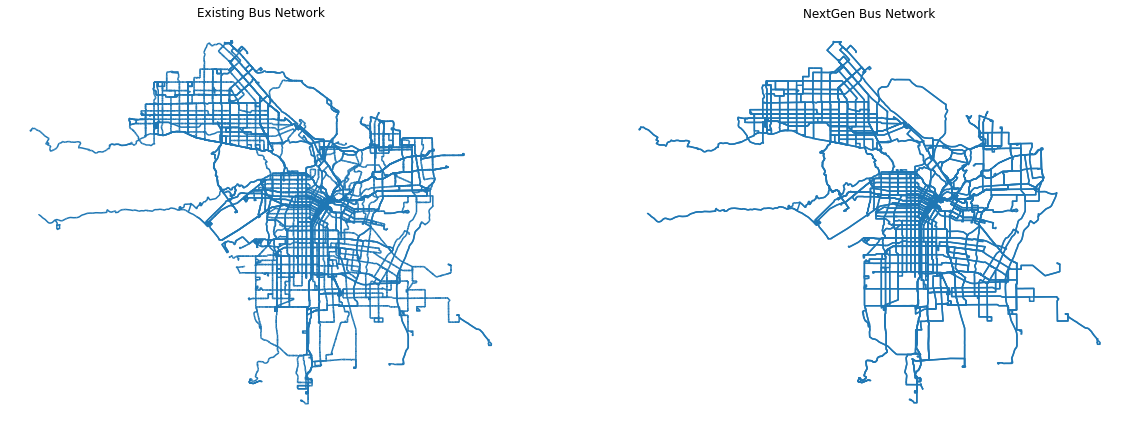

In [17]:

# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
ex.plot(ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Existing Bus Network")

# spatial lag map on the right
nxtg.plot(ax=ax2, # this assigns the map to the subplot,
            legend=True
           )

ax2.axis("off")
ax2.set_title("NextGen Bus Network")

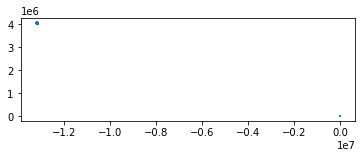

In [18]:
ax = nxtg.plot()
ex.plot(ax=ax)

In [19]:
place = 'Koreatown, Los Angeles, CA, USA'
network_type = 'drive'
trip_times = [5,10,15,20,30] # in minutes
meters_per_minute = 75 #travel distance per minute

In [20]:
%%time
# %%time isa magic command to see how long it takes this cell to run

# download the street network
G = ox.graph_from_place(place, network_type=network_type)

CPU times: user 1.41 s, sys: 37.2 ms, total: 1.45 s
Wall time: 6.46 s


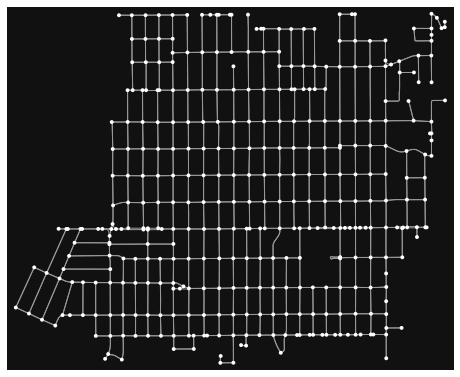

In [21]:
fig, ax = ox.plot_graph(G)

In [22]:
place = 'Koreatown, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5,10,15,20,30] # in minutes
meters_per_minute = 75

In [23]:
G1 = ox.graph_from_place(place,network_type=network_type)

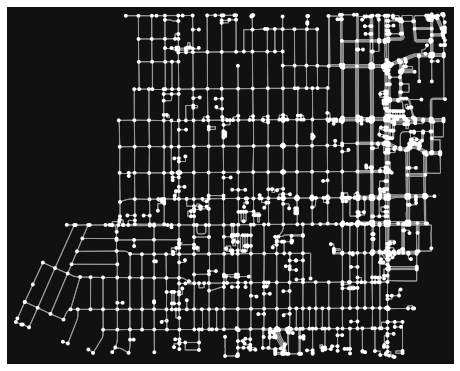

In [24]:
fig, ax = ox.plot_graph(G1)

In [25]:
# project our network data to Web Mercator 

# Web Mercator is a projected coordinate system aka PCS

# a projected coordinate system allows us to conduct spatial analysis

# a GCS defines where the data is located on the earth's surface

# a PCS tells the data how to draw on a flat surface, like a paper map or computer screen

G = ox.project_graph(G, to_crs='epsg:3857')

# Convert edges and nodes to geodataframes

In [26]:
# convert nodes and edges to geodataframes

# OSMnx has a function `graphs_to_gdfs()` that can convert the graph into two separate GeoDataFrames

# the first geodataframe contains info about the nodes and the second about the edges

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [27]:
gdf_nodes.head()

y             x     osmid          highway         lon  \
15855775  4.037091e+06 -1.317011e+07  15855775  traffic_signals -118.309108   
15855777  4.036114e+06 -1.317011e+07  15855777  traffic_signals -118.309070   
18166943  4.039056e+06 -1.316775e+07  18166943  traffic_signals -118.287918   
21300235  4.037104e+06 -1.316817e+07  21300235  traffic_signals -118.291651   
60947654  4.039053e+06 -1.316845e+07  60947654              NaN -118.294194   

                lat                           geometry  
15855775  34.061706  POINT (-13170109.659 4037090.593)  
15855777  34.054441  POINT (-13170105.373 4036114.467)  
18166943  34.076333  POINT (-13167750.776 4039056.334)  
21300235  34.061803  POINT (-13168166.299 4037103.654)  
60947654  34.076307  POINT (-13168449.484 4039052.760)

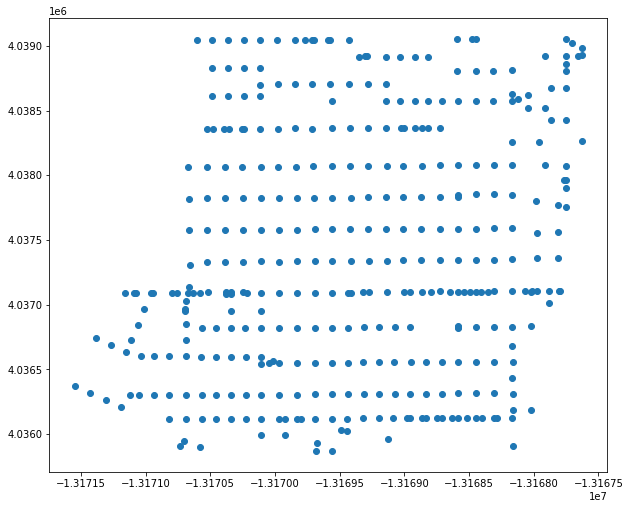

In [28]:
gdf_nodes.plot(figsize=(10,10))

In [29]:
gdf_edges.head()

osmid   lanes  \
0                       [398048057, 384302911]  [6, 7]   
1                       [398048067, 398048051]       7   
2  [863234032, 47895363, 159904470, 398053655]  [4, 5]   
3                       [398053760, 398053724]  [4, 5]   
4                                    607517405       2   

                                     name      highway  oneway   length  \
0                      Wilshire Boulevard      primary   False   86.998   
1                      Wilshire Boulevard      primary   False  115.801   
2  [South Western Avenue, Western Avenue]      primary   False  201.479   
3                          Western Avenue      primary   False  113.561   
4                       San Marino Street  residential   False  114.662   

                                            geometry maxspeed         u  \
0  LINESTRING (-13170109.659 4037090.593, -131701...      NaN  15855775   
1  LINESTRING (-13170109.659 4037090.593, -131700...      NaN  15855775   
2  LINESTRING (-13170109.659 4037090.593, -131701...   35 mph  15855775   
3  LINESTRING (-13170109.659 4037090.593, -131701...   35 mph  15855775   
4  LINESTRING (-13170105.373 4036114.467, -131699...      NaN  15855777   

            v  key  
0  3876035883    0  
1   122583757    0  
2  1719825072    0  
3   122851798    0  
4   122583770    0

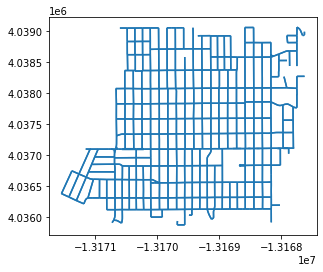

In [30]:
gdf_edges.plot()

In [31]:
gdf_edges['highway'].value_counts()

residential     748
primary         182
tertiary        160
secondary        78
primary_link      4
Name: highway, dtype: int64

# Working with Census Data

In [32]:
# load the data
tr = gpd.read_file('data/acs2019_5yr_B08134_14000US06037185320.geojson')

I want to inspect the data! Use `.shape`, `.head`, `.tail`, and `.plot` to do so. 

In [33]:
tr.shape

(1005, 243)

In [34]:
tr.head(50)

geoid                                   name  B08134001  \
0   14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1   14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2   14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3   14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4   14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   
5   14000US06037101400     Census Tract 1014, Los Angeles, CA     1464.0   
6   14000US06037102103  Census Tract 1021.03, Los Angeles, CA      768.0   
7   14000US06037102104  Census Tract 1021.04, Los Angeles, CA     1333.0   
8   14000US06037102105  Census Tract 1021.05, Los Angeles, CA     1047.0   
9   14000US06037102107  Census Tract 1021.07, Los Angeles, CA     1885.0   
10  14000US06037103101  Census Tract 1031.01, Los Angeles, CA     1177.0   
11  14000US06037103102  Census Tract 1031.02, Los Angeles, CA     2506.0   
12  14000US06037103200     Census Tract 1032, Los Angeles, CA     2591.0   
13  14000US06037103300     Census Tract 1033, Los Angeles, CA     1708.0   
14  14000US06037103400     Census Tract 1034, Los Angeles, CA     3003.0   
15  14000US06037104103  Census Tract 1041.03, Los Angeles, CA     1411.0   
16  14000US06037104105  Census Tract 1041.05, Los Angeles, CA     2548.0   
17  14000US06037104108  Census Tract 1041.08, Los Angeles, CA     2651.0   
18  14000US06037104124  Census Tract 1041.24, Los Angeles, CA     1515.0   
19  14000US06037104201  Census Tract 1042.01, Los Angeles, CA     1851.0   
20  14000US06037104203  Census Tract 1042.03, Los Angeles, CA     2414.0   
21  14000US06037104204  Census Tract 1042.04, Los Angeles, CA     1456.0   
22  14000US06037104310  Census Tract 1043.10, Los Angeles, CA     2249.0   
23  14000US06037104320  Census Tract 1043.20, Los Angeles, CA     2497.0   
24  14000US06037104401  Census Tract 1044.01, Los Angeles, CA     1449.0   
25  14000US06037104403  Census Tract 1044.03, Los Angeles, CA     1451.0   
26  14000US06037104404  Census Tract 1044.04, Los Angeles, CA     1191.0   
27  14000US06037104500     Census Tract 1045, Los Angeles, CA     1542.0   
28  14000US06037104610  Census Tract 1046.10, Los Angeles, CA     1519.0   
29  14000US06037104620  Census Tract 1046.20, Los Angeles, CA     1651.0   
30  14000US06037104701  Census Tract 1047.01, Los Angeles, CA     1469.0   
31  14000US06037104703  Census Tract 1047.03, Los Angeles, CA      827.0   
32  14000US06037104704  Census Tract 1047.04, Los Angeles, CA     1567.0   
33  14000US06037104810  Census Tract 1048.10, Los Angeles, CA     2673.0   
34  14000US06037104821  Census Tract 1048.21, Los Angeles, CA     1699.0   
35  14000US06037104822  Census Tract 1048.22, Los Angeles, CA     1245.0   
36  14000US06037106010  Census Tract 1060.10, Los Angeles, CA     1483.0   
37  14000US06037106020  Census Tract 1060.20, Los Angeles, CA     2669.0   
38  14000US06037106111  Census Tract 1061.11, Los Angeles, CA     2158.0   
39  14000US06037106112  Census Tract 1061.12, Los Angeles, CA     2663.0   
40  14000US06037106113  Census Tract 1061.13, Los Angeles, CA     1587.0   
41  14000US06037106114  Census Tract 1061.14, Los Angeles, CA     2449.0   
42  14000US06037106403  Census Tract 1064.03, Los Angeles, CA     1501.0   
43  14000US06037106405  Census Tract 1064.05, Los Angeles, CA     1781.0   
44  14000US06037106406  Census Tract 1064.06, Los Angeles, CA     2663.0   
45  14000US06037106407  Census Tract 1064.07, Los Angeles, CA     1068.0   
46  14000US06037106408  Census Tract 1064.08, Los Angeles, CA     1667.0   
47  14000US06037106510  Census Tract 1065.10, Los Angeles, CA     2349.0   
48  14000US06037106520  Census Tract 1065.20, Los Angeles, CA     2727.0   
49  14000US06037106603  Census Tract 1066.03, Los Angeles, CA     1421.0   

    B08134001, Error  B08134002  B08134002, Error  B08134003  \
0              257.0       86.0              74.0       82.0   
1           

In [35]:
tr.tail(10)

geoid                                   name  B08134001  \
995   14000US06037980020  Census Tract 9800.20, Los Angeles, CA        0.0   
996   14000US06037980021  Census Tract 9800.21, Los Angeles, CA       18.0   
997   14000US06037980022  Census Tract 9800.22, Los Angeles, CA        0.0   
998   14000US06037980023  Census Tract 9800.23, Los Angeles, CA        0.0   
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA      134.0   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        5.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA       24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
1004      16000US0644000                        Los Angeles, CA  1841598.0   

      B08134001, Error  B08134002  B08134002, Error  B08134003  \
995               12.0        0.0              12.0        0.0   
996               18.0        0.0              12.0        0.0   
997               12.0        0.0              12.0        0.0   
998               12.0        0.0              12.0        0.0   
999               70.0        0.0              12.0       10.0   
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              27.0       15.0              26.0        9.0   
1003              12.0        0.0              12.0        0.0   
1004            6239.0   107784.0            2748.0   170859.0   

      B08134003, Error  B08134004  B08134004, Error  ...  B08134116, Error  \
995               12.0        0.0              12.0  ...              12.0   
996               12.0        0.0              12.0  ...              12.0   
997               12.0        0.0              12.0  ...              12.0   
998               12.0        0.0              12.0  ...              12.0   
999                7.0       49.0              64.0  ...              12.0   
1000              12.0        0.0              12.0  ...              12.0   
1001              12.0        0.0              12.0  ...              12.0   
1002               7.0        0.0              12.0  ...              12.0   
1003              12.0        0.0              12.0  ...              12.0   
1004            2908.0   229791.0            3044.0  ...             362.0   

      B08134117  B08134117, Error  B08134118  B08134118, Error  B08134119  \
995         0.0              12.0        0.0              12.0        0.0   
996         0.0              12.0        0.0              12.0        0.0   
997         0.0              12.0        0.0              12.0        0.0   
998         0.0              12.0        0.0              12.0        0.0   
999         4.0               6.0        0.0              12.0        0.0   
1000        0.0              12.0        0.0              12.0        0.0   
1001        0.0              12.0        0.0              12.0        0.0   
1002        0.0              12.0        0.0              12.0        0.0   
1003        0.0              12.0        0.0              12.0        0.0   
1004     9712.0             836.0     3427.0             431.0     3700.0   

      B08134119, Error  B08134120  B08134120, Error  \
995               12.0        0.0              12.0   
996               12.0        0.0              12.0   
997               12.0        0.0              12.0   
998               12.0        0.0              12.0   
999               12.0        0.0              12.0   
1000              12.0        0.0              12.0   
1001              12.0        0.0              12.0   
1002              12.0        0.0              12.0   
1003              12.0        0.0              12.0   
1004             429.0     6317.0             520.0   

                                               geometry  
995   MULTIPOLYGON (((-118.34412 34.21700, -118.3438...  
996 

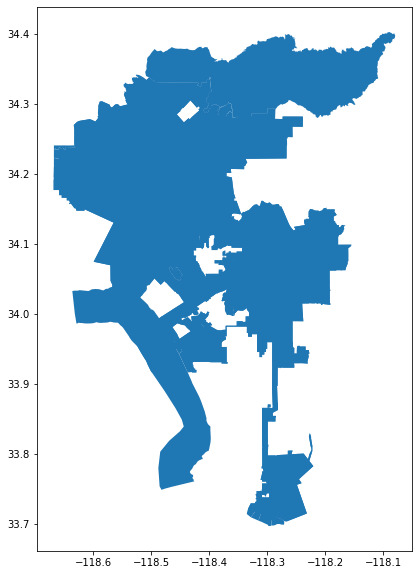

In [36]:
# plot the data
tr.plot(figsize=(10,10))

# Overwrite the default display settings

Because of default settings, we do not see the entire dataset in the dataframe. I am going to overwrite the pandas default display

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
tr.sample()

geoid                                name  B08134001  \
942  14000US06037291300  Census Tract 2913, Los Angeles, CA     1511.0   

     B08134001, Error  B08134002  B08134002, Error  B08134003  \
942             157.0       90.0              43.0      244.0   

     B08134003, Error  B08134004  B08134004, Error  B08134005  \
942              77.0      210.0              72.0      129.0   

     B08134005, Error  B08134006  B08134006, Error  B08134007  \
942              64.0       61.0              35.0      207.0   

     B08134007, Error  B08134008  B08134008, Error  B08134009  \
942              75.0      114.0              53.0      152.0   

     B08134009, Error  B08134010  B08134010, Error  B08134011  \
942              55.0      304.0             104.0     1424.0   

     B08134011, Error  B08134012  B08134012, Error  B08134013  \
942             141.0       85.0              41.0      244.0   

     B08134013, Error  B08134014  B08134014, Error  B08134015  \
942              77.0      187.0              64.0      129.0   

     B08134015, Error  B08134016  B08134016, Error  B08134017  \
942              64.0       61.0              35.0      181.0   

     B08134017, Error  B08134018  B08134018, Error  B08134019  \
942              69.0      107.0              51.0      126.0   

     B08134019, Error  B08134020  B08134020, Error  B08134021  \
942              51.0      304.0             104.0     1354.0   

     B08134021, Error  B08134022  B08134022, Error  B08134023  \
942             139.0       85.0              41.0      240.0   

     B08134023, Error  B08134024  B08134024, Error  B08134025  \
942              77.0      181.0              65.0      102.0   

     B08134025, Error  B08134026  B08134026, Error  B08134027  \
942              57.0       47.0              31.0      172.0   

     B08134027, Error  B08134028  B08134028, Error  B08134029  \
942              68.0      107.0              51.0      116.0   

     B08134029, Error  B08134030  B08134030, Error  B08134031  \
942              48.0      304.0             104.0       70.0   

     B08134031, Error  B08134032  B08134032, Error  B08134033  \
942              39.0        0.0              12.0        4.0   

     B08134033, Error  B08134034  B08134034, Error  B08134035  \
942               8.0        6.0              10.0       27.0   

     B08134035, Error  B08134036  B08134036, Error  B08134037  \
942              29.0       14.0              16.0        9.0   

     B08134037, Error  B08134038  B08134038, Error  B08134039  \
942              14.0        0.0              12.0       10.0   

     B08134039, Error  B08134040  B08134040, Error  B08134041  \
942              13.0        0.0              12.0       61.0   

     B08134041, Error  B08134042  B08134042, Error  B08134043  \
942              38.0        0.0              12.0        4.0   

     B08134043, Error  B08134044  B08134044, Error  B08134045  \
942               8.0        6.0              10.0       27.0   

     B08134045, Error  B08134046  B08134046, Error  B08134047  \
942              29.0       14.0              16.0        0.0   

     B08134047, Error  B08134048  B08134048, Error  B08134049  \
942              12.0        0.0              12.0       10.0   

     B08134049, Error  B08134050  B08134050, Error  B08134051  \
942              13.0        0.0              12.0        9.0   

     B08134051, Error  B08134052  B08134052, Error  B08134053  \
942              14.0        0.0              12.0        0.0   

     B08134053, Error  B08134054  B08134054, Error  B08134055  \
942              12.0        0.0              12.0        0.0   

     B08134055, Error  B08134056  B08134056, Error  B08134057  \
942              12.0        0.0              12.0        9.0   

     B08134057, Error  B08134058  B08134058, Error  B08134059  \
942              14.0        0.0              12.0        0.0   

     B08134059, Error  B08134060  B08134060, Error  B08134061  \
942  

In [39]:
# drop the last row in the dataset with the index 1004, because it is the row for the City, not an indvidual census tract
tr=tr.drop([1004])

In [40]:
tr.tail()

geoid                                   name  B08134001  \
999   14000US06037980024  Census Tract 9800.24, Los Angeles, CA      134.0   
1000  14000US06037980026  Census Tract 9800.26, Los Angeles, CA        5.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA        0.0   
1002  14000US06037980031  Census Tract 9800.31, Los Angeles, CA       24.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   

      B08134001, Error  B08134002  B08134002, Error  B08134003  \
999               70.0        0.0              12.0       10.0   
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              27.0       15.0              26.0        9.0   
1003              12.0        0.0              12.0        0.0   

      B08134003, Error  B08134004  B08134004, Error  B08134005  \
999                7.0       49.0              64.0       11.0   
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002               7.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   

      B08134005, Error  B08134006  B08134006, Error  B08134007  \
999                8.0       10.0              10.0       32.0   
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   

      B08134007, Error  B08134008  B08134008, Error  B08134009  \
999               18.0        4.0               6.0       13.0   
1000              12.0        0.0              12.0        5.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   

      B08134009, Error  B08134010  B08134010, Error  B08134011  \
999               11.0        5.0               7.0      130.0   
1000               8.0        0.0              12.0        5.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0       15.0   
1003              12.0        0.0              12.0        0.0   

      B08134011, Error  B08134012  B08134012, Error  B08134013  \
999               71.0        0.0              12.0       10.0   
1000               8.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              26.0       15.0              26.0        0.0   
1003              12.0        0.0              12.0        0.0   

      B08134013, Error  B08134014  B08134014, Error  B08134015  \
999                7.0       49.0              64.0       11.0   
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   

      B08134015, Error  B08134016  B08134016, Error  B08134017  \
999                8.0       10.0              10.0       28.0   
1000              12.0        0.0              12.0        0.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0              12.0        0.0   

      B08134017, Error  B08134018  B08134018, Error  B08134019  \
999               17.0        4.0               6.0       13.0   
1000              12.0        0.0              12.0        5.0   
1001              12.0        0.0              12.0        0.0   
1002              12.0        0.0              12.0        0.0   
1003              12.0        0.0           

In [41]:
list(tr)

['geoid',
 'name',
 'B08134001',
 'B08134001, Error',
 'B08134002',
 'B08134002, Error',
 'B08134003',
 'B08134003, Error',
 'B08134004',
 'B08134004, Error',
 'B08134005',
 'B08134005, Error',
 'B08134006',
 'B08134006, Error',
 'B08134007',
 'B08134007, Error',
 'B08134008',
 'B08134008, Error',
 'B08134009',
 'B08134009, Error',
 'B08134010',
 'B08134010, Error',
 'B08134011',
 'B08134011, Error',
 'B08134012',
 'B08134012, Error',
 'B08134013',
 'B08134013, Error',
 'B08134014',
 'B08134014, Error',
 'B08134015',
 'B08134015, Error',
 'B08134016',
 'B08134016, Error',
 'B08134017',
 'B08134017, Error',
 'B08134018',
 'B08134018, Error',
 'B08134019',
 'B08134019, Error',
 'B08134020',
 'B08134020, Error',
 'B08134021',
 'B08134021, Error',
 'B08134022',
 'B08134022, Error',
 'B08134023',
 'B08134023, Error',
 'B08134024',
 'B08134024, Error',
 'B08134025',
 'B08134025, Error',
 'B08134026',
 'B08134026, Error',
 'B08134027',
 'B08134027, Error',
 'B08134028',
 'B08134028, Error',
 

In [42]:
# columns to keep
columns_to_keep = ['geoid',
                  'name',
                  'B08134001',
                  'B08134021',
                  'B08134022',
                  'B08134023',
                  'B08134024',
                  'B08134025',
                  'B08134026',
                  'B08134027',
                  'B08134028',
                  'B08134029',
                  'B08134030',
                  'B08134071',
                  'B08134072',
                  'B08134073',
                   'B08134074',
                   'B08134075',
                  'B08134076',
                  'B08134077',
                  'B08134078',
                  'B08134079',
                  'B08134080',
                  'geometry']

In [43]:
tr = tr[columns_to_keep]

In [44]:
tr.head()

geoid                                   name  B08134001  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA     1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA     2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA     1564.0   

   B08134021  B08134022  B08134023  B08134024  B08134025  B08134026  \
0     1656.0       86.0       26.0      115.0      387.0      156.0   
1     1617.0        9.0       17.0       39.0      143.0      130.0   
2     2430.0      266.0      248.0      247.0      434.0      117.0   
3     1323.0       58.0      121.0      175.0      209.0       29.0   
4     1457.0       57.0       50.0      183.0      253.0       86.0   

   B08134027  B08134028  B08134029  B08134030  B08134071  B08134072  \
0      259.0      328.0      149.0      150.0       36.0        0.0   
1      378.0      279.0      343.0      279.0        0.0        0.0   
2      481.0      215.0      238.0      184.0       68.0        0.0   
3      245.0      287.0      107.0       92.0       48.0        0.0   
4      257.0      156.0      212.0      203.0       26.0        0.0   

   B08134073  B08134074  B08134075  B08134076  B08134077  B08134078  \
0        0.0        0.0        0.0        0.0       10.0        0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0   
2        0.0        0.0        0.0       25.0        0.0        0.0   
3        0.0       19.0        9.0        0.0        0.0        0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0   

   B08134079  B08134080                                           geometry  
0        0.0       26.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1        0.0        0.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2        0.0       43.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3        0.0       20.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4        0.0       26.0  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

# Rename columns

In [45]:
list(tr)

['geoid',
 'name',
 'B08134001',
 'B08134021',
 'B08134022',
 'B08134023',
 'B08134024',
 'B08134025',
 'B08134026',
 'B08134027',
 'B08134028',
 'B08134029',
 'B08134030',
 'B08134071',
 'B08134072',
 'B08134073',
 'B08134074',
 'B08134075',
 'B08134076',
 'B08134077',
 'B08134078',
 'B08134079',
 'B08134080',
 'geometry']

In [46]:
tr.columns = ['geoid',
 'name',
 'Total',
 'Drove alone',
 'Less than 10 minutes',
 '10 to 14 minutes',
 '15 to 19 minutes',
 '20 to 24 minutes',
 '25 to 29 minutes',
 '30 to 34 minutes',
 '35 to 44 minutes',
 '45 to 59 minutes',
 '60 or more minutes',
 'Bus',
 'Less than 10 minutes',
 '10 to 14 minutes',
 '15 to 19 minutes',
 '20 to 24 minutes',
 '25 to 29 minutes',
 '30 to 34 minutes',
 '35 to 44 minutes',
 '45 to 59 minutes',
 '60 or more minutes',
 'geometry']

In [47]:
tr.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  1564.0   

   Drove alone  Less than 10 minutes  10 to 14 minutes  15 to 19 minutes  \
0       1656.0                  86.0              26.0             115.0   
1       1617.0                   9.0              17.0              39.0   
2       2430.0                 266.0             248.0             247.0   
3       1323.0                  58.0             121.0             175.0   
4       1457.0                  57.0              50.0             183.0   

   20 to 24 minutes  25 to 29 minutes  30 to 34 minutes  35 to 44 minutes  \
0             387.0             156.0             259.0             328.0   
1             143.0             130.0             378.0             279.0   
2             434.0             117.0             481.0             215.0   
3             209.0              29.0             245.0             287.0   
4             253.0              86.0             257.0             156.0   

   45 to 59 minutes  60 or more minutes   Bus  Less than 10 minutes  \
0             149.0               150.0  36.0                   0.0   
1             343.0               279.0   0.0                   0.0   
2             238.0               184.0  68.0                   0.0   
3             107.0                92.0  48.0                   0.0   
4             212.0               203.0  26.0                   0.0   

   10 to 14 minutes  15 to 19 minutes  20 to 24 minutes  25 to 29 minutes  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0              25.0   
3               0.0              19.0               9.0               0.0   
4               0.0               0.0               0.0               0.0   

   30 to 34 minutes  35 to 44 minutes  45 to 59 minutes  60 or more minutes  \
0              10.0               0.0               0.0                26.0   
1               0.0               0.0               0.0                 0.0   
2               0.0               0.0               0.0                43.0   
3               0.0               0.0               0.0                20.0   
4               0.0               0.0               0.0                26.0   

                                            geometry  
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...

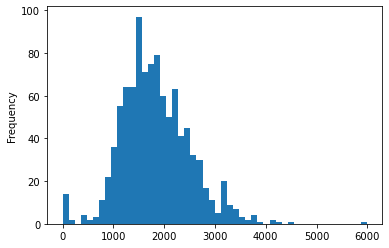

In [48]:
tr['Total'].plot.hist(bins=50)

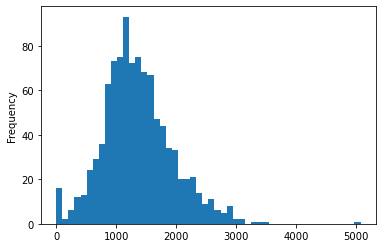

In [49]:
tr['Drove alone'].plot.hist(bins=50)

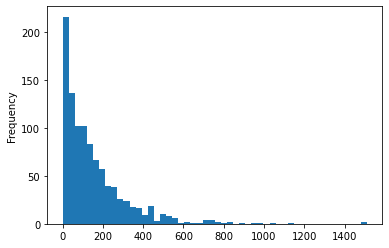

In [50]:
tr['Bus'].plot.hist(bins=50)

# Sorting

I want to find the top 10 census tracts with the most bus ridership

In [51]:
# create new variable tr_sorted
tr_sorted = tr.sort_values(by='Bus',ascending = False)

In [52]:
tr_sorted[['geoid','Total','Bus']].head(10)

geoid   Total     Bus
569  14000US06037209402  2184.0  1510.0
563  14000US06037209102  2929.0  1488.0
562  14000US06037208904  1927.0  1125.0
557  14000US06037208720  2332.0  1029.0
561  14000US06037208903  2297.0   973.0
550  14000US06037208401  2319.0   939.0
570  14000US06037209403  1862.0   878.0
560  14000US06037208902  1455.0   836.0
568  14000US06037209401  2096.0   821.0
620  14000US06037213401  2772.0   796.0

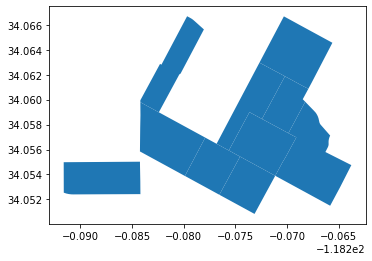

In [53]:
tr_sorted.head(10).plot()

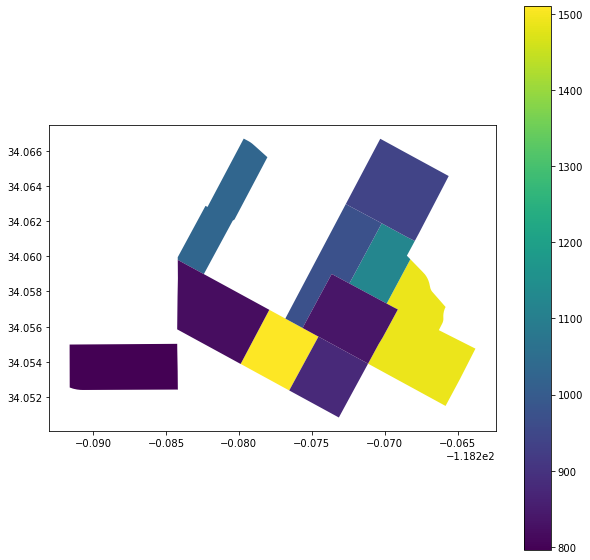

In [54]:
tr_sorted.head(10).plot(figsize=(10,10),column='Bus',legend=True)

In [55]:
tr_sorted = tr.sort_values(by='Drove alone',ascending = False)

In [56]:
tr_sorted[['geoid','Drove alone']].head(100)

geoid  Drove alone
922  14000US06037275602       5074.0
292  14000US06037134903       3498.0
84   14000US06037111400       3358.0
344  14000US06037143400       3337.0
82   14000US06037111301       3107.0
92   14000US06037113233       3088.0
334  14000US06037141302       3042.0
929  14000US06037276603       3005.0
263  14000US06037132300       2938.0
128  14000US06037119002       2919.0
98   14000US06037113321       2904.0
925  14000US06037276100       2879.0
636  14000US06037216200       2873.0
65   14000US06037108202       2862.0
138  14000US06037119800       2859.0
101  14000US06037113421       2846.0
861  14000US06037267402       2835.0
106  14000US06037115201       2794.0
205  14000US06037125100       2773.0
107  14000US06037115202       2772.0
842  14000US06037264301       2743.0
924  14000US06037276000       2724.0
350  14000US06037143800       2715.0
645  14000US06037217100       2702.0
375  14000US06037185100       2682.0
209  14000US06037125401       2681.0
150  14000US06037120400       2678.0
253  14000US06037131400       2635.0
100  14000US06037113401       2608.0
741  14000US06037232400       2584.0
244  14000US06037128702       2583.0
893  14000US06037271701       2582.0
290  14000US06037134800       2572.0
14   14000US06037103400       2572.0
858  14000US06037267100       2568.0
301  14000US06037135203       2557.0
248  14000US06037131010       2551.0
896  14000US06037271802       2542.0
249  14000US06037131020       2526.0
210  14000US06037125402       2521.0
102  14000US06037113422       2511.0
967  14000US06037295103       2510.0
343  14000US06037143300       2494.0
977  14000US06037297000       2475.0
864  14000US06037267501       2471.0
303  14000US06037137103       2464.0
322  14000US06037139503       2444.0
79   14000US06037111204       2433.0
2    14000US06037101210       2430.0
884  14000US06037270100       2428.0
843  14000US06037264302       2426.0
110  14000US06037115401       2426.0
546  14000US06037207900       2415.0
126  14000US06037117530       2413.0
945  14000US06037293202       2412.0
743  14000US06037232600       2403.0
467  14000US06037195500       2397.0
314  14000US06037139001       2396.0
930  14000US06037276604       2395.0
75   14000US06037109800       2391.0
202  14000US06037124700       2361.0
919  14000US06037275311       2320.0
353  14000US06037181000       2316.0
760  14000US06037236100       2315.0
332  14000US06037141201       2314.0
220  14000US06037127400       2312.0
931  14000US06037277000       2307.0
214  14000US06037127102       2306.0
12   14000US06037103200       2298.0
409  14000US06037189902       2292.0
944  14000US06037293201       2278.0
330  14000US06037141101       2274.0
294  14000US06037134905       2270.0
859  14000US06037267200       2263.0
326  14000US06037139702       2259.0
37   14000US06037106020       2258.0
731  14000US06037231500       2253.0
277  14000US06037134303       2250.0
547  14000US06037208000       2246.0
740  14000US06037232300       2241.0
345  14000US06037143500       2239.0
262  14000US06037132102       2234.0
381  14000US06037186100       2227.0
149  14000US06037120300       2227.0
255  14000US06037131701       2225.0
64   14000US06037108201       2220.0
778  14000US06037238000       2206.0
39   14000US06037106112       2192.0
918  14000US06037275302       2191.0
732  14000US06037231600       2187.0
74   14000US06037109700       2186.0
729  14000US06037231300       2171.0
208  14000US06037125320       2168.0
257  14000US06037131800       2167.0
162  14000US06037122000       2166.0
642  14000US06037216900       2164.0
466  14000US06037195400       2164.0
637  14000US06037216300       2156.0
920  14000US06037275400       2145.0
187  14000US06037123800       2140.0

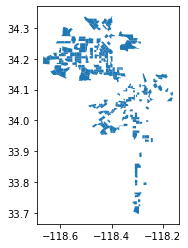

In [57]:
tr_sorted.head(250).plot()

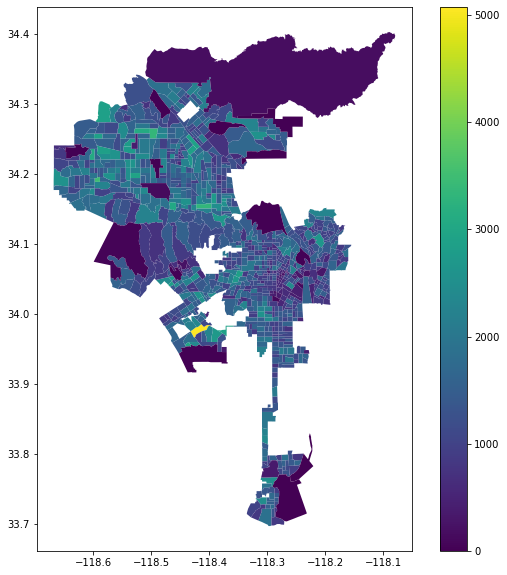

In [58]:
tr_sorted.head(1003).plot(figsize=(10,10),column='Drove alone',legend=True)

# FIlter the data

In [59]:
# subset the data so that we can see the data per row
# I want to see the census tracts that have no population
tr[tr['Total']==0]

geoid                                   name  Total  \
995   14000US06037980020  Census Tract 9800.20, Los Angeles, CA    0.0   
997   14000US06037980022  Census Tract 9800.22, Los Angeles, CA    0.0   
998   14000US06037980023  Census Tract 9800.23, Los Angeles, CA    0.0   
1001  14000US06037980028  Census Tract 9800.28, Los Angeles, CA    0.0   
1003  14000US06037990200     Census Tract 9902, Los Angeles, CA    0.0   

      Drove alone  Less than 10 minutes  10 to 14 minutes  15 to 19 minutes  \
995           0.0                   0.0               0.0               0.0   
997           0.0                   0.0               0.0               0.0   
998           0.0                   0.0               0.0               0.0   
1001          0.0                   0.0               0.0               0.0   
1003          0.0                   0.0               0.0               0.0   

      20 to 24 minutes  25 to 29 minutes  30 to 34 minutes  35 to 44 minutes  \
995                0.0               0.0               0.0               0.0   
997                0.0               0.0               0.0               0.0   
998                0.0               0.0               0.0               0.0   
1001               0.0               0.0               0.0               0.0   
1003               0.0               0.0               0.0               0.0   

      45 to 59 minutes  60 or more minutes  Bus  Less than 10 minutes  \
995                0.0                 0.0  0.0                   0.0   
997                0.0                 0.0  0.0                   0.0   
998                0.0                 0.0  0.0                   0.0   
1001               0.0                 0.0  0.0                   0.0   
1003               0.0                 0.0  0.0                   0.0   

      10 to 14 minutes  15 to 19 minutes  20 to 24 minutes  25 to 29 minutes  \
995                0.0               0.0               0.0               0.0   
997                0.0               0.0               0.0               0.0   
998                0.0               0.0               0.0               0.0   
1001               0.0               0.0               0.0               0.0   
1003               0.0               0.0               0.0               0.0   

      30 to 34 minutes  35 to 44 minutes  45 to 59 minutes  \
995                0.0               0.0               0.0   
997                0.0               0.0               0.0   
998                0.0               0.0               0.0   
1001               0.0               0.0               0.0   
1003               0.0               0.0               0.0   

      60 or more minutes                                           geometry  
995                  0.0  MULTIPOLYGON (((-118.34412 34.21700, -118.3438...  
997                  0.0  MULTIPOLYGON (((-118.50266 34.30809, -118.5026...  
998                  0.0  MULTIPOLYGON (((-118.64870 34.23120, -118.6480...  
1001                 0.0  MULTIPOLYGON (((-118.45246 33.94315, -118.4464...  
1003                 0.0  MULTIPOLYGON (((-118.63598 34.03255, -118.6325...

# Normalize the data

In [60]:
# output the column
list(tr)

['geoid',
 'name',
 'Total',
 'Drove alone',
 'Less than 10 minutes',
 '10 to 14 minutes',
 '15 to 19 minutes',
 '20 to 24 minutes',
 '25 to 29 minutes',
 '30 to 34 minutes',
 '35 to 44 minutes',
 '45 to 59 minutes',
 '60 or more minutes',
 'Bus',
 'Less than 10 minutes',
 '10 to 14 minutes',
 '15 to 19 minutes',
 '20 to 24 minutes',
 '25 to 29 minutes',
 '30 to 34 minutes',
 '35 to 44 minutes',
 '45 to 59 minutes',
 '60 or more minutes',
 'geometry']

In [61]:
# create a new column and populate it with normalized data to get the percent of total value
# we are creating new variables
tr['Percent Drove alone'] = tr['Drove alone']/tr['Total']*100
tr['Percent Bus']= tr['Bus']/tr['Total']*100

In [62]:
tr.head()

geoid                                   name   Total  \
0  14000US06037101110  Census Tract 1011.10, Los Angeles, CA  1945.0   
1  14000US06037101122  Census Tract 1011.22, Los Angeles, CA  1757.0   
2  14000US06037101210  Census Tract 1012.10, Los Angeles, CA  2928.0   
3  14000US06037101220  Census Tract 1012.20, Los Angeles, CA  1525.0   
4  14000US06037101300     Census Tract 1013, Los Angeles, CA  1564.0   

   Drove alone  Less than 10 minutes  10 to 14 minutes  15 to 19 minutes  \
0       1656.0                  86.0              26.0             115.0   
1       1617.0                   9.0              17.0              39.0   
2       2430.0                 266.0             248.0             247.0   
3       1323.0                  58.0             121.0             175.0   
4       1457.0                  57.0              50.0             183.0   

   20 to 24 minutes  25 to 29 minutes  30 to 34 minutes  35 to 44 minutes  \
0             387.0             156.0             259.0             328.0   
1             143.0             130.0             378.0             279.0   
2             434.0             117.0             481.0             215.0   
3             209.0              29.0             245.0             287.0   
4             253.0              86.0             257.0             156.0   

   45 to 59 minutes  60 or more minutes   Bus  Less than 10 minutes  \
0             149.0               150.0  36.0                   0.0   
1             343.0               279.0   0.0                   0.0   
2             238.0               184.0  68.0                   0.0   
3             107.0                92.0  48.0                   0.0   
4             212.0               203.0  26.0                   0.0   

   10 to 14 minutes  15 to 19 minutes  20 to 24 minutes  25 to 29 minutes  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0              25.0   
3               0.0              19.0               9.0               0.0   
4               0.0               0.0               0.0               0.0   

   30 to 34 minutes  35 to 44 minutes  45 to 59 minutes  60 or more minutes  \
0              10.0               0.0               0.0                26.0   
1               0.0               0.0               0.0                 0.0   
2               0.0               0.0               0.0                43.0   
3               0.0               0.0               0.0                20.0   
4               0.0               0.0               0.0                26.0   

                                            geometry  Percent Drove alone  \
0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...            85.141388   
1  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...            92.031873   
2  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...            82.991803   
3  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...            86.754098   
4  MULTIPOLYGON (((-118.27822 34.25068, -118.2782...            93.158568   

   Percent Bus  
0     1.850900  
1     0.000000  
2     2.322404  
3     3.147541  
4     1.662404

In [63]:
# I want to see the top 10 census tracts with the highest percent of bus riders
trpercent_sorted = tr.sort_values(by='Percent Bus',ascending = False)

In [64]:
trpercent_sorted.head()

geoid                                   name   Total  \
569  14000US06037209402  Census Tract 2094.02, Los Angeles, CA  2184.0   
562  14000US06037208904  Census Tract 2089.04, Los Angeles, CA  1927.0   
560  14000US06037208902  Census Tract 2089.02, Los Angeles, CA  1455.0   
536  14000US06037206300     Census Tract 2063, Los Angeles, CA   795.0   
563  14000US06037209102  Census Tract 2091.02, Los Angeles, CA  2929.0   

     Drove alone  Less than 10 minutes  10 to 14 minutes  15 to 19 minutes  \
569        226.0                   0.0              54.0              16.0   
562        363.0                  36.0              38.0              13.0   
560        243.0                   9.0              29.0              44.0   
536        100.0                  40.0               0.0              18.0   
563       1071.0                  76.0             118.0              94.0   

     20 to 24 minutes  25 to 29 minutes  30 to 34 minutes  35 to 44 minutes  \
569              17.0               0.0              50.0              19.0   
562              28.0              11.0              96.0              80.0   
560              34.0               0.0              90.0              18.0   
536               0.0               0.0              42.0               0.0   
563             130.0              79.0             114.0             232.0   

     45 to 59 minutes  60 or more minutes     Bus  Less than 10 minutes  \
569              25.0                45.0  1510.0                   0.0   
562              27.0                34.0  1125.0                   0.0   
560              16.0                 3.0   836.0                   0.0   
536               0.0                 0.0   447.0                   0.0   
563             102.0               126.0  1488.0                  27.0   

     10 to 14 minutes  15 to 19 minutes  20 to 24 minutes  25 to 29 minutes  \
569              26.0             172.0              61.0               0.0   
562              10.0              70.0             117.0              23.0   
560              29.0              31.0               4.0               0.0   
536              39.0               0.0              12.0               0.0   
563              55.0             117.0             107.0               0.0   

     30 to 34 minutes  35 to 44 minutes  45 to 59 minutes  60 or more minutes  \
569             560.0              65.0              96.0               530.0   
562             502.0             102.0              18.0               283.0   
560             210.0             117.0              89.0               356.0   
536             169.0              11.0              17.0               199.0   
563             455.0              65.0             152.0               510.0   

                                              geometry  Percent Drove alone  \
569  MULTIPOLYGON (((-118.27988 34.05388, -118.2797...            10.347985   
562  MULTIPOLYGON (((-118.27185 34.05934, -118.2713...            18.837571   
560  MULTIPOLYGON (((-118.27468 34.05739, -118.2736...            16.701031   
536  MULTIPOLYGON (((-118.25041 34.04326, -118.2490...            12.578616   
563  MULTIPOLYGON (((-118.27065 34.05464, -118.2704...            36.565381   

     Percent Bus  
569    69.139194  
562    58.380903  
560    57.457045  
536    56.226415  
563    50.802322

In [65]:
trpercent_sorted[['geoid','name','Percent Bus']].head(10)

geoid                                   name  Percent Bus
569  14000US06037209402  Census Tract 2094.02, Los Angeles, CA    69.139194
562  14000US06037208904  Census Tract 2089.04, Los Angeles, CA    58.380903
560  14000US06037208902  Census Tract 2089.02, Los Angeles, CA    57.457045
536  14000US06037206300     Census Tract 2063, Los Angeles, CA    56.226415
563  14000US06037209102  Census Tract 2091.02, Los Angeles, CA    50.802322
564  14000US06037209103  Census Tract 2091.03, Los Angeles, CA    50.032701
599  14000US06037212203  Census Tract 2122.03, Los Angeles, CA    48.852901
570  14000US06037209403  Census Tract 2094.03, Los Angeles, CA    47.153598
548  14000US06037208301  Census Tract 2083.01, Los Angeles, CA    46.063348
557  14000US06037208720  Census Tract 2087.20, Los Angeles, CA    44.125214

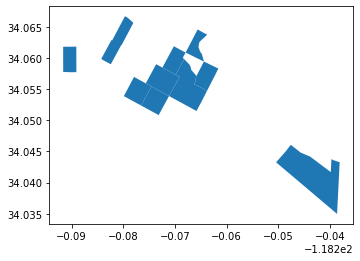

In [66]:
trpercent_sorted.head(10).plot()

In [67]:
trpercent_sorted.head()

geoid                                   name   Total  \
569  14000US06037209402  Census Tract 2094.02, Los Angeles, CA  2184.0   
562  14000US06037208904  Census Tract 2089.04, Los Angeles, CA  1927.0   
560  14000US06037208902  Census Tract 2089.02, Los Angeles, CA  1455.0   
536  14000US06037206300     Census Tract 2063, Los Angeles, CA   795.0   
563  14000US06037209102  Census Tract 2091.02, Los Angeles, CA  2929.0   

     Drove alone  Less than 10 minutes  10 to 14 minutes  15 to 19 minutes  \
569        226.0                   0.0              54.0              16.0   
562        363.0                  36.0              38.0              13.0   
560        243.0                   9.0              29.0              44.0   
536        100.0                  40.0               0.0              18.0   
563       1071.0                  76.0             118.0              94.0   

     20 to 24 minutes  25 to 29 minutes  30 to 34 minutes  35 to 44 minutes  \
569              17.0               0.0              50.0              19.0   
562              28.0              11.0              96.0              80.0   
560              34.0               0.0              90.0              18.0   
536               0.0               0.0              42.0               0.0   
563             130.0              79.0             114.0             232.0   

     45 to 59 minutes  60 or more minutes     Bus  Less than 10 minutes  \
569              25.0                45.0  1510.0                   0.0   
562              27.0                34.0  1125.0                   0.0   
560              16.0                 3.0   836.0                   0.0   
536               0.0                 0.0   447.0                   0.0   
563             102.0               126.0  1488.0                  27.0   

     10 to 14 minutes  15 to 19 minutes  20 to 24 minutes  25 to 29 minutes  \
569              26.0             172.0              61.0               0.0   
562              10.0              70.0             117.0              23.0   
560              29.0              31.0               4.0               0.0   
536              39.0               0.0              12.0               0.0   
563              55.0             117.0             107.0               0.0   

     30 to 34 minutes  35 to 44 minutes  45 to 59 minutes  60 or more minutes  \
569             560.0              65.0              96.0               530.0   
562             502.0             102.0              18.0               283.0   
560             210.0             117.0              89.0               356.0   
536             169.0              11.0              17.0               199.0   
563             455.0              65.0             152.0               510.0   

                                              geometry  Percent Drove alone  \
569  MULTIPOLYGON (((-118.27988 34.05388, -118.2797...            10.347985   
562  MULTIPOLYGON (((-118.27185 34.05934, -118.2713...            18.837571   
560  MULTIPOLYGON (((-118.27468 34.05739, -118.2736...            16.701031   
536  MULTIPOLYGON (((-118.25041 34.04326, -118.2490...            12.578616   
563  MULTIPOLYGON (((-118.27065 34.05464, -118.2704...            36.565381   

     Percent Bus  
569    69.139194  
562    58.380903  
560    57.457045  
536    56.226415  
563    50.802322

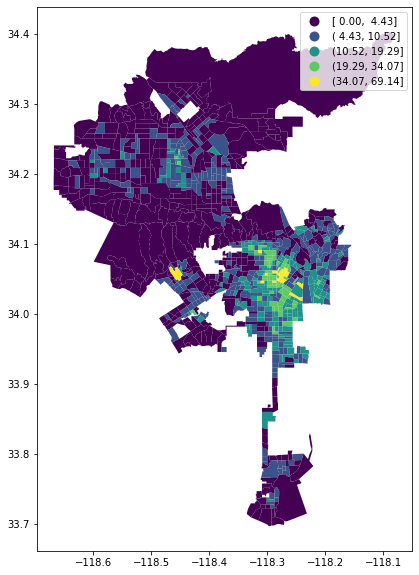

In [68]:
tr.plot(figsize=(12,10),
            column='Percent Bus',
            legend=True,
            scheme='NaturalBreaks')

# Use subplots to create multiple plots

Text(0.5, 1.0, 'Percentage of Car Drivers by Census Tract')

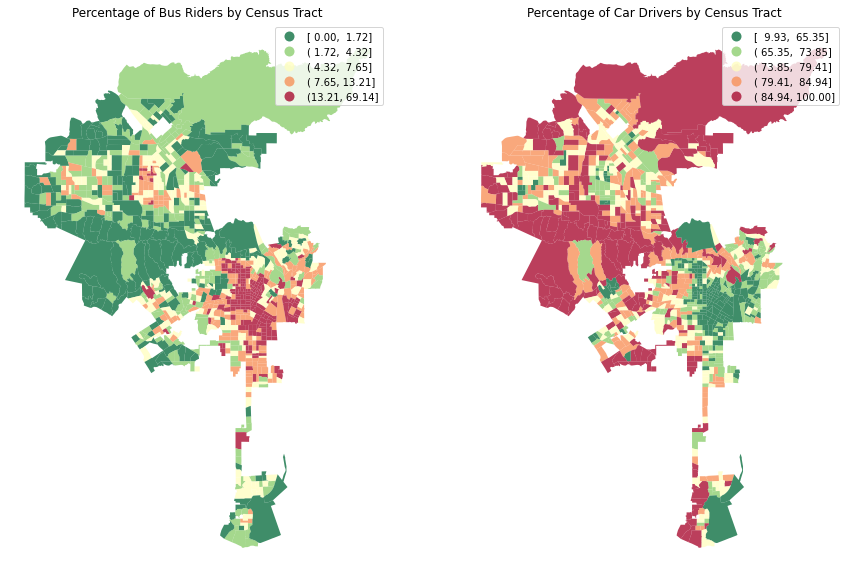

In [76]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the left
tr.plot(column='Percent Bus', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percentage of Bus Riders by Census Tract")

# spatial lag map on the right
tr.plot(column='Percent Drove alone', 
            cmap='RdYlGn_r', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percentage of Car Drivers by Census Tract")

In [70]:
tr[tr['Percent Bus']>50]

geoid                                   name   Total  \
536  14000US06037206300     Census Tract 2063, Los Angeles, CA   795.0   
560  14000US06037208902  Census Tract 2089.02, Los Angeles, CA  1455.0   
562  14000US06037208904  Census Tract 2089.04, Los Angeles, CA  1927.0   
563  14000US06037209102  Census Tract 2091.02, Los Angeles, CA  2929.0   
564  14000US06037209103  Census Tract 2091.03, Los Angeles, CA  1529.0   
569  14000US06037209402  Census Tract 2094.02, Los Angeles, CA  2184.0   

     Drove alone  Less than 10 minutes  10 to 14 minutes  15 to 19 minutes  \
536        100.0                  40.0               0.0              18.0   
560        243.0                   9.0              29.0              44.0   
562        363.0                  36.0              38.0              13.0   
563       1071.0                  76.0             118.0              94.0   
564        521.0                  34.0              13.0              65.0   
569        226.0                   0.0              54.0              16.0   

     20 to 24 minutes  25 to 29 minutes  30 to 34 minutes  35 to 44 minutes  \
536               0.0               0.0              42.0               0.0   
560              34.0               0.0              90.0              18.0   
562              28.0              11.0              96.0              80.0   
563             130.0              79.0             114.0             232.0   
564              74.0              84.0             109.0              18.0   
569              17.0               0.0              50.0              19.0   

     45 to 59 minutes  60 or more minutes     Bus  Less than 10 minutes  \
536               0.0                 0.0   447.0                   0.0   
560              16.0                 3.0   836.0                   0.0   
562              27.0                34.0  1125.0                   0.0   
563             102.0               126.0  1488.0                  27.0   
564              23.0               101.0   765.0                   4.0   
569              25.0                45.0  1510.0                   0.0   

     10 to 14 minutes  15 to 19 minutes  20 to 24 minutes  25 to 29 minutes  \
536              39.0               0.0              12.0               0.0   
560              29.0              31.0               4.0               0.0   
562              10.0              70.0             117.0              23.0   
563              55.0             117.0             107.0               0.0   
564              30.0              84.0             179.0               0.0   
569              26.0             172.0              61.0               0.0   

     30 to 34 minutes  35 to 44 minutes  45 to 59 minutes  60 or more minutes  \
536             169.0              11.0              17.0               199.0   
560             210.0             117.0              89.0               356.0   
562             502.0             102.0              18.0               283.0   
563             455.0              65.0             152.0               510.0   
564              61.0              75.0              85.0               247.0   
569             560.0              65.0              96.0               530.0   

                                              geometry  Percent Drove alone  \
536  MULTIPOLYGON (((-118.25041 34.04326, -118.2490...            12.578616   
560  MULTIPOLYGON (((-118.27468 34.05739, -118.2736...            16.701031   
562  MULTIPOLYGON (((-118.27185 34.05934, -118.2713...            18.837571   
563  MULTIPOLYGON (((-118.27065 34.05464, -118.2704...            36.565381   
564  MULTIPOLYGON (((-118.26605 34.05618, -118.2660...            34.074559   
569  MULTIPOLYGON (((-118.27988 34.05388, -118.2797...            10.347985   

     Percent Bus  
536    56.226415  
560    57.457045  
562    58.380903  
563    50.802322  
564    50.032701  
569    69.139194

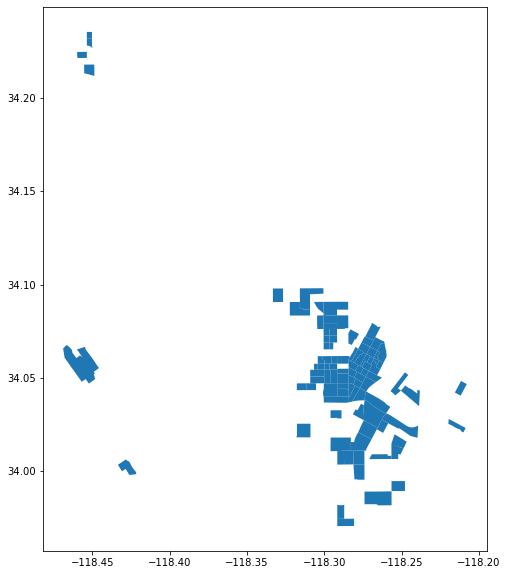

In [71]:
tr[tr['Percent Bus']>20].plot(figsize=(12,10))

# Add a basemap to this

In [72]:
# reproject to Web Mercator
tr_web_mercator = tr.to_crs(epsg=3857)

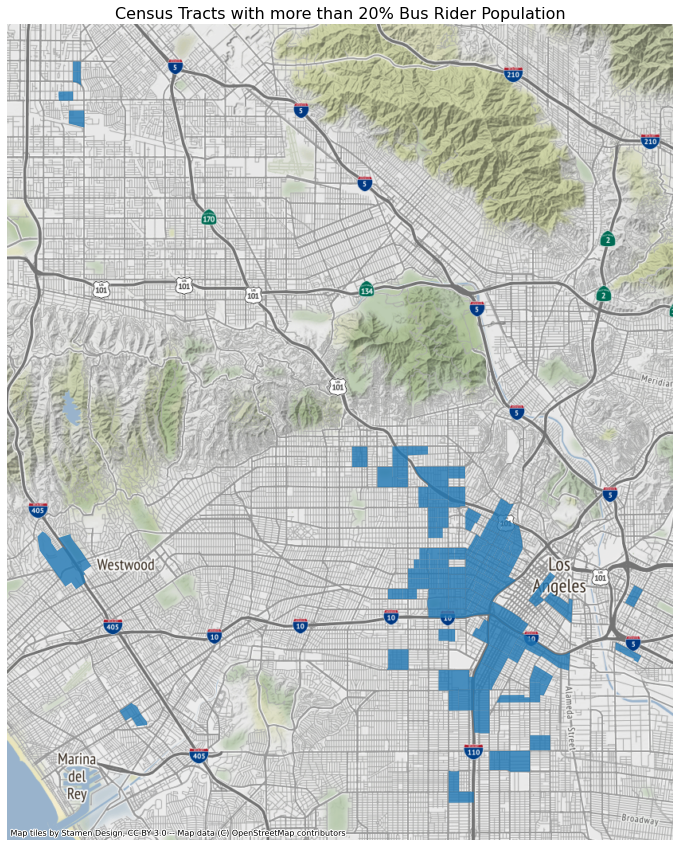

In [73]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent Bus'] > 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 20% Bus Rider Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

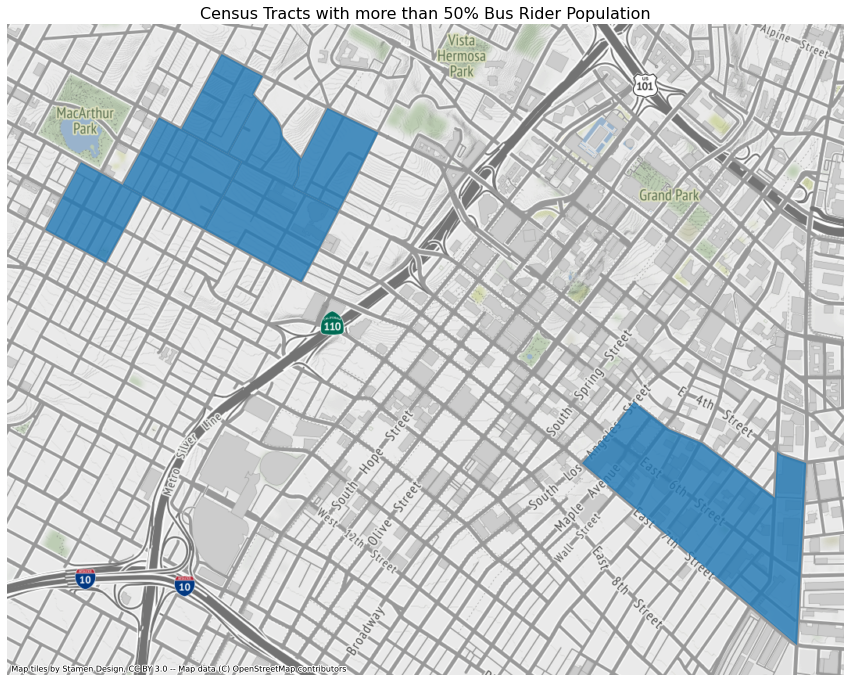

In [74]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent Bus'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% Bus Rider Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

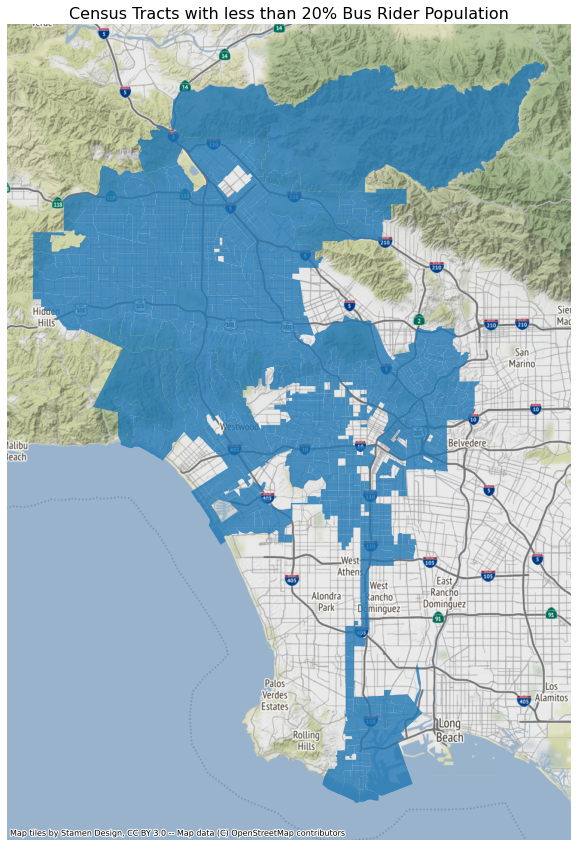

In [75]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent Bus'] < 20].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with less than 20% Bus Rider Population',fontsize=16)

# add a basemap
ctx.add_basemap(ax)